<a href="https://colab.research.google.com/github/hanene2030/numpy/blob/main/8_ndarrays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np


# Making ndarrays

In [5]:
#3 D list
three_dim_list = [[[1,2],[3,4]],[[5,6],[7,8]]]
#Convert to nparray
three_dim_array = np.array(three_dim_list)
three_dim_array


array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [8]:
three_dim_array.shape

(2, 2, 2)

In [10]:
back_to_list = three_dim_array.tolist()
back_to_list

[[[1, 2], [3, 4]], [[5, 6], [7, 8]]]

In [13]:
#indexing
three_dim_array[0]

array([[1, 2],
       [3, 4]])

In [14]:
three_dim_array[0,0, 0]

1

In [12]:
three_dim_array[0,0]

array([1, 2])

In [15]:
#I want 6
three_dim_array[1,0,1]

6

In [16]:
#Making array
four_dim_array = np.zeros((2,2,3,5))
four_dim_array

array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]])

#Slicing and aggregating

In [21]:
rng = np.random.default_rng()
array = rng.integers(0,10,size=42).reshape(3,2,7)
array

array([[[3, 9, 4, 2, 6, 9, 2],
        [9, 3, 5, 4, 8, 8, 0]],

       [[0, 2, 5, 7, 0, 4, 7],
        [5, 1, 3, 1, 7, 4, 7]],

       [[6, 6, 7, 0, 7, 8, 6],
        [0, 3, 7, 9, 9, 0, 6]]])

In [23]:
array[:1,:1,:]

array([[[3, 9, 4, 2, 6, 9, 2]]])

In [24]:
array[:1,1:,:]

array([[[9, 3, 5, 4, 8, 8, 0]]])

In [26]:
array[1,:,0::6]

array([[0, 7],
       [5, 7]])

In [30]:
array[1,:,[0,6]]

array([[0, 5],
       [7, 7]])

In [34]:
#Boolean indexing
array[array > 8] = 20
array

array([[[ 3, 20,  4,  2,  6, 20,  2],
        [20,  3,  5,  4,  8,  8,  0]],

       [[ 0,  2,  5,  7,  0,  4,  7],
        [ 5,  1,  3,  1,  7,  4,  7]],

       [[ 6,  6,  7,  0,  7,  8,  6],
        [ 0,  3,  7, 20, 20,  0,  6]]])

In [35]:
#Agregates fnct
array.sum()

254

In [39]:
array.sum(axis=2)

array([[57, 48],
       [25, 28],
       [40, 56]])

In [40]:
array.max(axis=2)

array([[20, 20],
       [ 7,  7],
       [ 8, 20]])

In [43]:
array.max(axis=0)

array([[ 6, 20,  7,  7,  7, 20,  7],
       [20,  3,  7, 20, 20,  8,  7]])

In [45]:
#Colored images


In [48]:
from skimage import data
import matplotlib.pyplot as plt


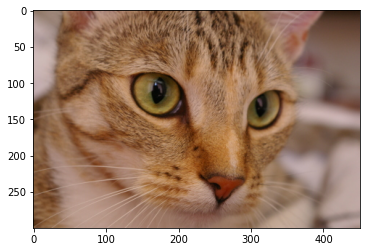

In [50]:
cat = data.chelsea()
plt.imshow(cat);

In [51]:
cat.shape

(300, 451, 3)

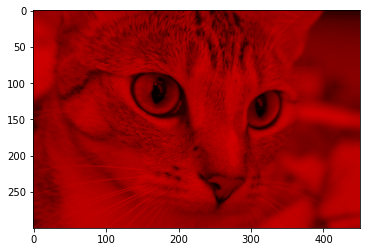

In [57]:
red_cat = cat.copy()
red_cat[:,:,1] = 0
red_cat[:,:,2] = 0
plt.imshow(red_cat);

In [58]:
#Cropping the image by removing the last column
rm_last_col = red_cat[:,:-1,:]
rm_last_col.shape

(300, 450, 3)

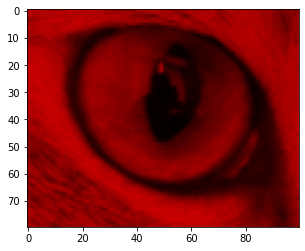

In [62]:
focus_on_eye = red_cat[80:160,120:220,:]
plt.imshow(focus_on_eye);

In [80]:
#Color modification
copy_cat = cat.copy()

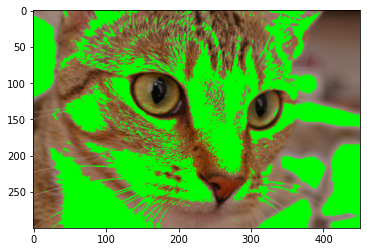

In [81]:

copy_cat[copy_cat[:,:,0] >160] = [0, 255, 0]
plt.imshow(copy_cat);

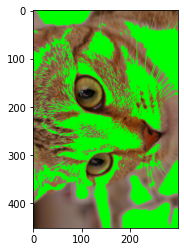

In [83]:
#Transpose the image
plt.imshow(copy_cat.transpose((1,0,2)));

# Understanding strides

In [95]:
array_s = np.arange(0,12).reshape(4,3)
array_s.strides, array_s.dtype# 64=>8 bytes

((24, 8), dtype('int64'))

In [94]:
#the array is stored as a continus amout of memory
array_s.dtype, array_s.flatten()

(dtype('int64'), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]))

In [96]:
array_s

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [97]:
#strides keep in track how colums and row work

In [105]:
transpose = array_s.transpose()
transpose[0,0]= 5 #View
display(array_s , transpose)

array([[ 5,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

array([[ 5,  3,  6,  9],
       [ 1,  4,  7, 10],
       [ 2,  5,  8, 11]])

In [102]:
transpose.dtype

dtype('int64')

In [100]:
transpose.strides

(8, 24)

In [113]:
sliced_array = array_s[::2, ::2]
sliced_array

array([[5, 2],
       [6, 8]])

In [114]:
sliced_array.strides

(48, 16)